# BOJ September 2025 Meeting: Market Impact Analysis

## Key Findings

1. **Market Response to BOJ Meeting (September 22, 2025)**:
   - Nikkei 225 showed resilience, rising from ¥45,193 to ¥45,493 on the announcement day
   - USD/JPY initially strengthened to ¥148.09, reflecting market sentiment

2. **Notable Movements**:
   - **Nikkei 225**: Peaked with a +1.15% daily change, demonstrating market confidence
   - **USD/JPY**: Exhibited a maximum move of +0.77%, indicating moderate currency impact

3. **Overall Trend**:
   - Equity markets maintained an upward trajectory post-announcement
   - Yen showed gradual depreciation against the dollar in subsequent sessions

*Note: Analysis covers market activity from September 16-29, 2025, providing context before and after the BOJ meeting.*

In [8]:
# First Notebook Cell: Pull and Save Data

import pandas as pd
import yfinance as yf

# Define the specific dates for the BOJ September 2025 Meeting
start_date = '2025-09-16'    # Start from Monday before announcement
end_date = '2025-09-29'      # Including several days after
announcement_date = '2025-09-19'  # BOJ Meeting day

print(f"Analyzing market reaction to BOJ September 2025 Meeting on {announcement_date}")
print(f"Data range: {start_date} to {end_date}")

# Pull data for Nikkei 225 and USD/JPY
print("\nDownloading Nikkei 225 data...")
nikkei_data = yf.download('^N225', start=start_date, end=end_date)
print(f"Retrieved {len(nikkei_data)} days of Nikkei data")
print(nikkei_data)

print("\nDownloading USD/JPY data...")
jpy_data = yf.download('JPY=X', start=start_date, end=end_date)
print(f"Retrieved {len(jpy_data)} days of USD/JPY data")
print(jpy_data)

# Create a single DataFrame with the close prices
data = pd.DataFrame(index=nikkei_data.index)  # Use Nikkei's index
data['Nikkei_Close'] = nikkei_data['Close']
data['JPY_Close'] = jpy_data['Close']

# Save the DataFrame to a CSV file in your data/ folder
data.to_csv('data/boj_market_reaction.csv')
print("\nData saved to data/boj_market_reaction.csv")
print("\nFinal Dataset Preview:")
print(data)

/var/folders/90/t7qrvpqs6fq0_g49myh8k6fh0000gp/T/ipykernel_956/3732962587.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei_data = yf.download('^N225', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/90/t7qrvpqs6fq0_g49myh8k6fh0000gp/T/ipykernel_956/3732962587.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  jpy_data = yf.download('JPY=X', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/90/t7qrvpqs6fq0_g49myh8k6fh0000gp/T/ipykernel_956/3732962587.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  jpy_data = yf.download('JPY=X', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Analyzing market reaction to BOJ September 2025 Meeting on 2025-09-19
Data range: 2025-09-16 to 2025-09-29

Retrieved 8 days of Nikkei data
Price              Close          High           Low          Open     Volume
Ticker             ^N225         ^N225         ^N225         ^N225      ^N225
Date                                                                         
2025-09-16  44902.269531  45055.378906  44616.320312  44948.851562  111700000
2025-09-17  44790.378906  45033.339844  44612.070312  44751.839844  104600000
2025-09-18  45303.429688  45508.671875  44815.398438  44910.500000  113700000
2025-09-19  45045.808594  45852.750000  44495.460938  45634.289062  208600000
2025-09-22  45493.660156  45757.738281  45193.769531  45193.769531  116600000
2025-09-24  45630.308594  45693.281250  45205.468750  45484.410156  131700000
2025-09-25  45754.929688  45824.691406  45503.308594  45600.070312  127200000
2025-09-26  45354.988281  45766.769531  45354.988281  45634.199219  147500000

R

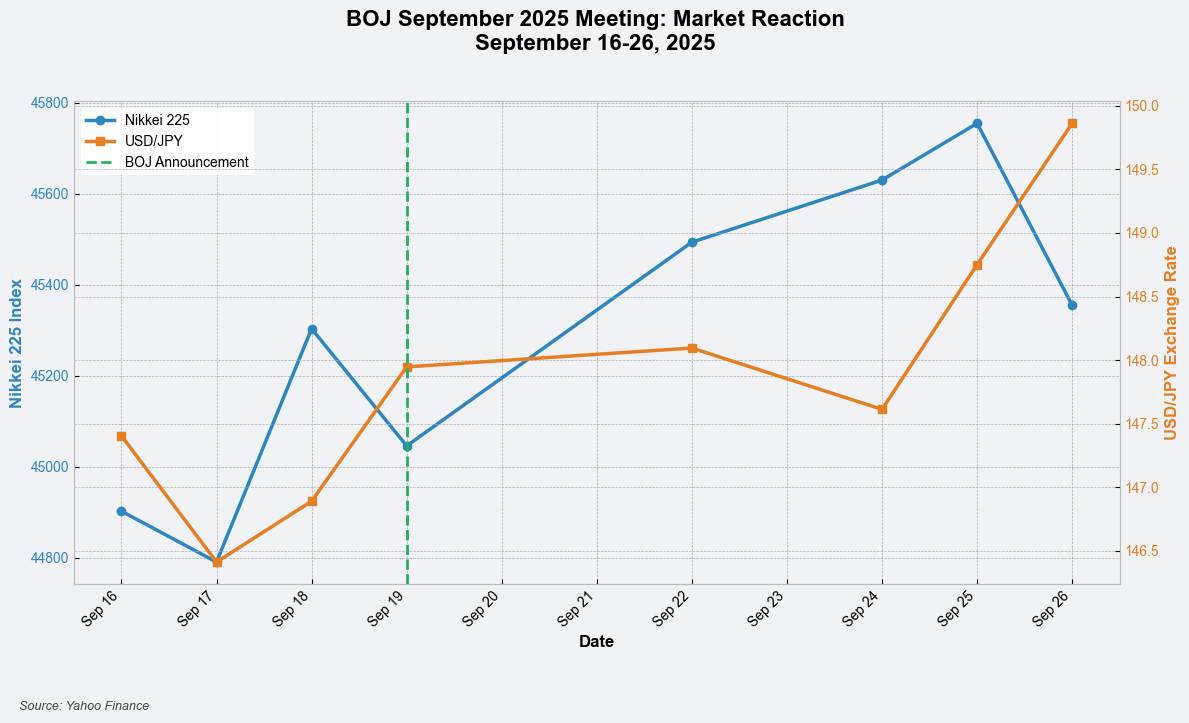

In [16]:
# Second Notebook Cell: Analysis and Charting

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('bmh')  # Use a built-in style that's clean and professional

# Read the data from the CSV file
df = pd.read_csv('data/boj_market_reaction.csv', index_col=0, parse_dates=True)

# Calculate maximum percentage changes
nikkei_pct = df['Nikkei_Close'].pct_change() * 100
jpy_pct = df['JPY_Close'].pct_change() * 100
nikkei_max = abs(nikkei_pct).max()
jpy_max = abs(jpy_pct).max()

# Create figure and axis with a darker background
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
fig, ax1 = plt.subplots(figsize=(12, 7), facecolor='#F0F2F6')
ax1.set_facecolor('#F0F2F6')

# Plot Nikkei on the primary Y-axis (ax1)
color = '#2E86C1'  # Adjusted blue for better contrast
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Nikkei 225 Index', color=color, fontsize=12, fontweight='bold')
line1 = ax1.plot(df.index, df['Nikkei_Close'], color=color, label='Nikkei 225', 
                 linewidth=2.5, marker='o', markersize=6)
ax1.tick_params(axis='y', labelcolor=color, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

# Create a secondary Y-axis (ax2) for USD/JPY
ax2 = ax1.twinx()
color = '#E67E22'  # Adjusted orange for better contrast
ax2.set_ylabel('USD/JPY Exchange Rate', color=color, fontsize=12, fontweight='bold')
line2 = ax2.plot(df.index, df['JPY_Close'], color=color, label='USD/JPY', 
                 linewidth=2.5, marker='s', markersize=6)
ax2.tick_params(axis='y', labelcolor=color, labelsize=10)

# Add a vertical line for the BOJ announcement
announcement_date = pd.to_datetime('2025-09-19')
line3 = plt.axvline(x=announcement_date, color='#27AE60', linestyle='--', 
                    linewidth=2, label='BOJ Announcement')

# Customize grid
ax1.grid(True, linestyle='--', alpha=0.5, color='#666666')

# Format x-axis to show all dates
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Sep 16'
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Add all lines to the legend
lines = line1 + line2 + [line3]
labels = [l.get_label() for l in lines]
# Move legend inside the plot area at top left
ax1.legend(lines, labels, loc='upper left',
          facecolor='white', edgecolor='none', fontsize=10, framealpha=0.9)

# Set the title with custom styling
title = fig.suptitle('BOJ September 2025 Meeting: Market Reaction\nSeptember 16-26, 2025', 
                     fontsize=16, fontweight='bold', y=1.02)

# Add a subtle caption with enhanced styling
plt.figtext(0.02, 0.02, 'Source: Yahoo Finance', fontsize=9, alpha=0.7, style='italic')

# Adjust layout with more space for dates
fig.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the figure with high DPI
plt.savefig('boj_market_reaction.png', dpi=300, bbox_inches='tight', facecolor='#F0F2F6')
plt.show()

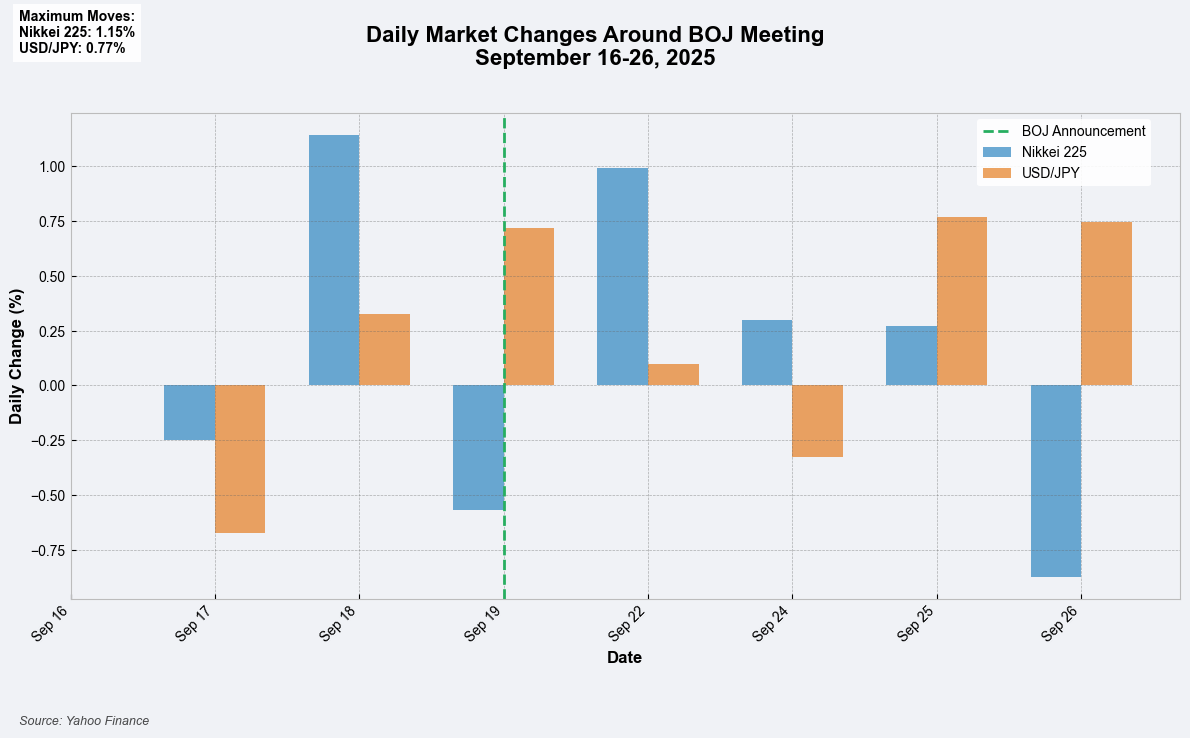

In [13]:
# Second Chart: Daily Percentage Changes

fig, ax = plt.subplots(figsize=(12, 7), facecolor='#F0F2F6')
ax.set_facecolor('#F0F2F6')

# Calculate daily percentage changes
nikkei_pct = df['Nikkei_Close'].pct_change() * 100
jpy_pct = df['JPY_Close'].pct_change() * 100

# Calculate maximum changes
nikkei_max = abs(nikkei_pct).max()
jpy_max = abs(jpy_pct).max()

# Plot daily percentage changes
bar_width = 0.35
x = range(len(df.index))

# Create bars for both metrics
bars1 = ax.bar([i - bar_width/2 for i in x], nikkei_pct, 
               bar_width, label='Nikkei 225', color='#2E86C1', alpha=0.7)
bars2 = ax.bar([i + bar_width/2 for i in x], jpy_pct, 
               bar_width, label='USD/JPY', color='#E67E22', alpha=0.7)

# Add BOJ announcement line
announcement_date = pd.to_datetime('2025-09-19')
announcement_idx = df.index.get_loc(announcement_date)
line = ax.axvline(x=announcement_idx, color='#27AE60', linestyle='--', 
                  linewidth=2, label='BOJ Announcement')

# Customize grid and axes
ax.grid(True, linestyle='--', alpha=0.5, color='#666666')
ax.set_ylabel('Daily Change (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels([d.strftime('%b %d') for d in df.index], rotation=45, ha='right')

# Add stats box with maximum moves
stats_text = f'Maximum Moves:\nNikkei 225: {nikkei_max:.2f}%\nUSD/JPY: {jpy_max:.2f}%'
plt.figtext(0.02, 0.98, stats_text, fontsize=10, bbox=dict(facecolor='white', 
           alpha=0.9, edgecolor='none'), fontweight='bold')

# Move legend to upper right with better positioning
ax.legend(loc='upper right', bbox_to_anchor=(0.98, 1.0),
         facecolor='white', edgecolor='none', fontsize=10, framealpha=0.9)

# Add title
title = fig.suptitle('Daily Market Changes Around BOJ Meeting\nSeptember 16-26, 2025', 
                     fontsize=16, fontweight='bold', y=1.02)

# Add source caption
plt.figtext(0.02, 0.02, 'Source: Yahoo Finance', fontsize=9, alpha=0.7, style='italic')

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the figure with high DPI
plt.savefig('boj_daily_changes.png', dpi=300, bbox_inches='tight', facecolor='#F0F2F6')
plt.show()